<a href="https://colab.research.google.com/github/c-susan/datasci_5_statistics/blob/main/python_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading in Packages

In [22]:
import pandas as pd
from scipy.stats import chi2_contingency as chi2, ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np

## **1. Chi-Square Test**

In [ ]:
df1 = pd.read_csv('Order_and_Referring_10_3_2023.csv')
df1.sample(5)

,NPI,LAST_NAME,FIRST_NAME,PARTB,DME,HHA,PMD
297912,1588307102,CLAUDIO,CLAUDIA,Y,Y,Y,Y
683414,1831727270,HIPP,LAUREN,Y,Y,Y,Y
384974,1063754646,DERESPINO,ALLISON,Y,Y,Y,Y
1336133,1922293414,RICKLIN,SUZANNE,Y,Y,N,N
565854,1265024145,GODDARD,LINDSEY,Y,Y,Y,Y


In [ ]:
## View the value counts of selected columns
# 'DME' = Indicates whether provider can order Durable Medical Equipment
df1['DME'].value_counts()

Y    1785838
N          1
Name: DME, dtype: int64

In [ ]:
# 'PMD' = Indicates whether provider can order Power Mobility Devices
df1['PMD'].value_counts()

Y    1475449
N     310390
Name: PMD, dtype: int64

In [ ]:
## Creating a contingency table of selected columns
contingency_table = pd.crosstab(df1['DME'], df1['PMD'])
contingency_table

PMD,N,Y
DME,,
N,1,0
Y,310389,1475449


In [ ]:
## Using the contingency table to perform a chi-square test
chi2, p, degf, expected = chi2(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")
print(f'Degrees of freedom: {degf}')
print(f'Expected Frequency: {expected}')

Chi2 value: 0.7409760431083185
P-value: 0.3893483960070897
Degrees of freedom: 1
Expected Frequency: [[1.73806261e-01 8.26193739e-01]
 [3.10389826e+05 1.47544817e+06]]


### **Summary**
**Question:** Is there an association between whether a provider can order Durable Medical Equipment (DME) and whether they can order Power Mobility Devices (PMD)?

**H0:** There is no relationship between DME and PMD (independent).

**H1:** There is a relationship between DME and PMD (dependent).

**Interpretation**

Since the p-value of 0.0.3893483960070897 is more than the significance level of 0.05, we do not reject the null hypothesis. There is no relationship between a provider's ability to order DME and their ability to order PMD (DME is independent of PMD).

**______________________________________________________________________________________________________________**

## **2. T-Test**

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/c-susan/datasci_5_statistics/main/datasets/Specific_Chronic_Conditions.csv')
df2.sample(5)

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
142233,County,North Carolina : Richmond,37153.0,<65,All,All,Alcohol Abuse,0.0442,13339.971333,13445.099778,NaN,NaN
157020,County,Texas : Johnson,48251.0,<65,All,All,Asthma,0.0781,23242.525442,23003.492844,NaN,NaN
10359,State,Oklahoma,40.0,<65,Sex,Male,Schizophrenia and Other Psychotic Disorders,0.1051,NaN,NaN,NaN,NaN
111272,County,Georgia : Washington,13303.0,<65,All,All,Hepatitis (Chronic Viral B & C),NaN,NaN,NaN,NaN,NaN
135400,County,Montana : Yellowstone,30111.0,<65,All,All,Heart Failure,0.0721,33798.504179,35028.129924,NaN,NaN


In [ ]:
## Selecting rows where column 'Bene_Demo_Desc' is either Female or Male, 'Bene_Age_Lvl' is All, and 'Prvlnc' is not null.
df2 = df2[(df2['Bene_Demo_Desc'].isin(['Female', 'Male'])) & (df2['Bene_Age_Lvl'] == 'All') & df2['Prvlnc'].notnull()]
df2.sample(5)

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
2950,State,Georgia,13.0,All,Sex,Male,Hypertension,0.6032,NaN,NaN,NaN,NaN
480,State,Alaska,2.0,All,Sex,Male,Hyperlipidemia,0.2577,NaN,NaN,NaN,NaN
12853,State,Utah,49.0,All,Sex,Female,Alzheimer's Disease/Dementia,0.0977,NaN,NaN,NaN,NaN
5183,State,Louisiana,22.0,All,Sex,Female,Stroke,0.0479,NaN,NaN,NaN,NaN
10100,State,Ohio,39.0,All,Sex,Male,Stroke,0.0378,NaN,NaN,NaN,NaN


In [ ]:
## Selecting alcohol abuse as the condition to focus on
alcohol = df2[df2['Bene_Cond'] == 'Alcohol Abuse']

In [ ]:
## Splitting the data into 2 groups: Female and Male
alcohol_female = alcohol[alcohol['Bene_Demo_Desc'] == 'Female']['Prvlnc']
alcohol_female

9        0.0092
282      0.0204
555      0.0114
828      0.0084
1101     0.0131
1374     0.0134
1647     0.0174
1920     0.0123
2193     0.0165
2466     0.0143
2739     0.0101
3012     0.0076
3285     0.0130
3558     0.0099
3831     0.0114
4104     0.0084
4377     0.0082
4650     0.0093
4923     0.0090
5196     0.0209
5469     0.0109
5742     0.0227
6015     0.0144
6288     0.0238
6561     0.0085
6834     0.0105
7107     0.0120
7380     0.0119
7653     0.0076
7926     0.0156
8199     0.0183
8472     0.0116
8745     0.0130
9018     0.0120
9291     0.0109
9564     0.0118
9837     0.0108
10110    0.0090
10383    0.0159
10656    0.0108
10929    0.0025
11202    0.0191
11475    0.0092
11748    0.0111
12021    0.0090
12294    0.0100
12840    0.0086
13113    0.0177
13386    0.0038
13659    0.0100
13932    0.0136
14205    0.0094
14478    0.0150
14751    0.0109
Name: Prvlnc, dtype: float64

In [ ]:
alcohol_male = alcohol[alcohol['Bene_Demo_Desc'] == 'Male']['Prvlnc']
alcohol_male

12       0.0306
285      0.0411
558      0.0274
831      0.0228
1104     0.0315
1377     0.0298
1650     0.0436
1923     0.0319
2196     0.0518
2469     0.0340
2742     0.0296
3015     0.0243
3288     0.0260
3561     0.0279
3834     0.0328
4107     0.0260
4380     0.0255
4653     0.0298
4926     0.0313
5199     0.0458
5472     0.0317
5745     0.0548
6018     0.0385
6291     0.0453
6564     0.0308
6837     0.0294
7110     0.0284
7383     0.0315
7656     0.0227
7929     0.0328
8202     0.0388
8475     0.0295
8748     0.0347
9021     0.0311
9294     0.0320
9567     0.0287
9840     0.0315
10113    0.0255
10386    0.0361
10659    0.0310
10932    0.0115
11205    0.0471
11478    0.0269
11751    0.0255
12024    0.0271
12297    0.0280
12843    0.0203
13116    0.0399
13389    0.0162
13662    0.0294
13935    0.0300
14208    0.0327
14481    0.0345
14754    0.0252
Name: Prvlnc, dtype: float64

In [ ]:
t_stat, p_val = ttest_ind(alcohol_female, alcohol_male, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -15.756728444684015
P-value: 1.9267043606049252e-26


In [ ]:
# Compute means for Female and Male data with 'Alcohol Abuse'
female_mean = alcohol_female.mean()
male_mean = alcohol_male.mean()

print(f"Mean prevalence for female: {female_mean}")
print(f"Mean prevalence for males: {male_mean}")

Mean prevalence for female: 0.012149999999999998
Mean prevalence for males: 0.03152962962962963


### **Summary**

**Question:** Is there a difference in means of alcohol abuse between males and females?

**H0:** There is no difference in means of alcohol abuse between males and females.

**H1:** There is a difference in means of alcohol abuse between males and females.

**Interpretation**

The p-value is 1.9267043606049252e-26, which is less than the significance level of 0.05. This means that there is a significant difference in means of alcohol abuse between males and females. The t-statisitic is -15.7567, which measures the difference between the means of the two groups, indicates that the mean in alcohol abuse for females is lower than for males.

**______________________________________________________________________________________________________________**

## **3. ANOVA**

In [ ]:
## Loading in dataset and cleaning the column names
df3 = pd.read_csv('https://raw.githubusercontent.com/c-susan/datasci_5_statistics/main/datasets/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')
df3.columns = df3.columns.str.replace(' ', '_', regex=True).str.replace('/', '_', regex=True).str.replace('(', '', regex=True).str.replace(')', '', regex=True).str.replace('-','', regex=True).str.lower()
df3.sample(5)

,data_as_of,start_date,end_date,group,year,month,state,sex,age_group,covid19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid19_deaths,influenza_deaths,"pneumonia,_influenza,_or_covid19_deaths",footnote
83671,09/27/2023,09/01/2021,09/30/2021,By Month,2021.0,9.0,New Hampshire,Male,65-74 years,NaN,126.0,10.0,NaN,0.0,12.0,One or more data cells have counts between 1-9...
30747,09/27/2023,06/01/2021,06/30/2021,By Month,2021.0,6.0,Connecticut,Female,45-54 years,NaN,53.0,NaN,NaN,0.0,NaN,One or more data cells have counts between 1-9...
133552,09/27/2023,09/01/2020,09/30/2020,By Month,2020.0,9.0,Wyoming,Female,All Ages,NaN,212.0,12.0,0.0,0.0,16.0,One or more data cells have counts between 1-9...
22012,09/27/2023,03/01/2022,03/31/2022,By Month,2022.0,3.0,Arizona,Male,65-74 years,73.0,750.0,90.0,49.0,NaN,116.0,One or more data cells have counts between 1-9...
74005,09/27/2023,12/01/2020,12/31/2020,By Month,2020.0,12.0,Missouri,All Sexes,5-14 years,0.0,12.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
## Filtering for columns 'sex', 'age_group', and 'covid-19_deaths'
df3 = df3[['sex', 'age_group', 'covid19_deaths']]
df3.sample(5)

,sex,age_group,covid19_deaths
117583,Male,45-54 years,197.0
28172,Male,1-4 years,0.0
67216,Female,75-84 years,230.0
21679,All Sexes,5-14 years,0.0
113495,Male,1-4 years,0.0


In [ ]:
## Selecting for rows where the column 'sex' equals 'All Sexes', column 'age_group' is not equal 'All Ages',
## and column 'covid-19_deaths' does not have any null values.
df3 = df3[(df3['sex'] == 'All Sexes') & (df3['age_group'] != 'All Ages') & df3['covid19_deaths'].notnull()]
df3.sample(5)

,sex,age_group,covid19_deaths
52228,All Sexes,5-14 years,0.0
88342,All Sexes,40-49 years,47.0
122099,All Sexes,15-24 years,0.0
111239,All Sexes,30-39 years,32.0
42793,All Sexes,5-14 years,0.0


In [ ]:
model = ols('covid19_deaths ~ C(age_group)', data=df3).fit()

In [ ]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq       df          F        PR(>F)
C(age_group)  2.891307e+09     15.0  12.530232  7.565137e-32
Residual      4.668617e+11  30349.0        NaN           NaN


### **Summary**
**Question:** Is there a significant difference in Covid-19 deaths between age groups?

**H0:** There is no significant difference in the mean number of COVID-19 deaths among different age groups.

**H1:** There is a significant difference in the mean number of COVID-19 deaths among different age groups.

**Interpretation**

F-value = 12.530232

P-value = 7.565137e-32

Since the p-value of 7.565137e-32 is less than 0.05, there is a significant difference in number of COVID-19 across age groups.

**______________________________________________________________________________________________________________**

## **4. Regression Analysis**

In [28]:
df4 = pd.read_csv('https://raw.githubusercontent.com/c-susan/datasci_5_statistics/main/datasets/CostReport_2019_Final.csv')
df4.sample(5)

,rpt_rec_num,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,...,Net Income from Service to Patients,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges
1877,700674,450771,TEXAS HEALTH PRESBYTERIAN HOSPITAL P,6200 WEST PARKER ROAD,PLANO,TX,75093,COLLIN,19124.0,U,...,59203550.0,13278569.0,72482119.0,NaN,72482119.0,0.241084,17386371.0,89713993.0,NaN,NaN
109,666113,341307,PENDER MEMORIAL HOSPITAL,507 E. FREMONT ST,BURGAW,NC,28425-,PENDER,48900.0,U,...,-9827382.0,9814243.0,-13139.0,-9818.0,-3321.0,0.414085,1940550.0,7705681.0,NaN,NaN
6009,719370,453315,CHILDRENS HOSPITAL OF SAN ANTONIO,519 WEST HOUSTON STREET,SAN ANTONIO,TX,78207,BEXAR,41700.0,U,...,-17966000.0,17994499.0,28499.0,NaN,28499.0,NaN,NaN,NaN,NaN,NaN
2842,706173,260057,CAMERON REGIONAL MEDICAL CENTER,1600 EAST EVERGREEN,CAMERON,MO,64429-,CLINTON,28140.0,U,...,-2322642.0,1416654.0,-905988.0,NaN,-905988.0,0.315841,2983827.0,16765716.0,NaN,NaN
4612,711302,461308,SAN JUAN HEALTH SERVICES DISTRICT,380 WEST 100 NORTH,MONTICELLO,UT,84535,SAN JUAN,99946.0,R,...,415258.0,1868225.0,2283483.0,NaN,2283483.0,0.659253,1288162.0,3605357.0,NaN,NaN


In [29]:
## Cleaning the column names
df4.columns = df4.columns.str.replace(' ', '_', regex=True).str.replace('/', '_', regex=True).str.replace('(', '', regex=True).str.replace(')', '', regex=True).str.replace('-','', regex=True).str.lower()
df4.sample(5)

,rpt_rec_num,provider_ccn,hospital_name,street_address,city,state_code,zip_code,county,medicare_cbsa_number,rural_versus_urban,...,net_income_from_service_to_patients,total_other_income,total_income,total_other_expenses,net_income,cost_to_charge_ratio,net_revenue_from_medicaid,medicaid_charges,net_revenue_from_standalone_schip,standalone_schip_charges
2565,705453,240053,PARK NICOLLET METHODIST HOSPITAL,6500 EXCELSIOR BLVD,ST. LOUIS PARK,MN,55426-4702,HENNEPIN,33460.0,U,...,47590606.0,60370261.0,107960867.0,7715000.0,100245867.0,0.447675,54790434.0,144521434.0,NaN,NaN
1875,700670,450292,TEXAS HEALTH KAUFMAN,850 ED HALL,KAUFMAN,TX,75142,KAUFMAN,19124.0,U,...,-3511898.0,2826879.0,-685019.0,NaN,-685019.0,0.192379,3912295.0,19691063.0,NaN,NaN
2270,704610,420080,HILTON HEAD HOSPITAL,25 HOSPITAL CENTER BLVD,HILTON HEAD ISLAND,SC,29926,BEAUFORT,25940.0,U,...,41297149.0,1099278.0,42396427.0,NaN,42396427.0,0.133428,6135351.0,48090667.0,NaN,NaN
5135,714330,190202,OCHSNER MEDICAL CENTER - BATON ROUGE,MEDICAL CENTER DRIVE,BATON ROUGE,LA,70816,E. BATON ROUGE PARISH,12940.0,U,...,9565913.0,32622404.0,42188317.0,NaN,42188317.0,0.246075,43281921.0,147611760.0,334848.0,1290840.0
4167,709332,100161,CENTRAL FLORIDA REGIONAL HOSPITAL,1401 W. SEMINOLE BLVD,SANFORD,FL,32771,SEMINOLE,36740.0,U,...,24171151.0,821907.0,24993058.0,-141.0,24993199.0,0.093196,11958887.0,246253194.0,NaN,NaN


In [30]:
## Selecting specific columns to be used in the regression analysis
df4['salaries,_wages,_and_fees_payable'] = df4['salaries,_wages,_and_fees_payable'].fillna(0)
df4['fte__employees_on_payroll'] = df4['fte__employees_on_payroll'].fillna(0)

In [31]:
## Defining the dependent and independent variables
x = df4['fte__employees_on_payroll']
y = df4['salaries,_wages,_and_fees_payable']

In [32]:
### Adding a constant to the independent variable (required for the statsmodels regression model)
x = sm.add_constant(x)

In [33]:
# Fitting the regression model
model = sm.OLS(y, x).fit()

                                    OLS Regression Results                                   
Dep. Variable:     salaries,_wages,_and_fees_payable   R-squared:                       0.432
Model:                                           OLS   Adj. R-squared:                  0.432
Method:                                Least Squares   F-statistic:                     4656.
Date:                               Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                                       03:27:08   Log-Likelihood:            -1.1024e+05
No. Observations:                               6118   AIC:                         2.205e+05
Df Residuals:                                   6116   BIC:                         2.205e+05
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                                coef    std err          t  

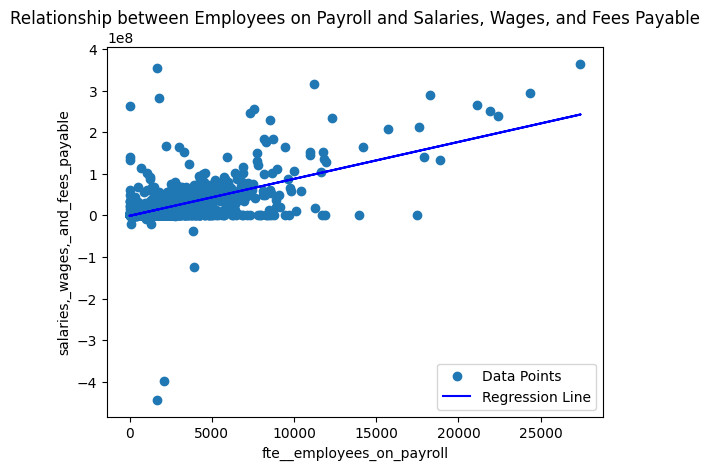

In [34]:
# Printing the summary of the regression
print(model.summary())

plt.scatter(df4['fte__employees_on_payroll'], df4['salaries,_wages,_and_fees_payable'], label='Data Points')
plt.plot(df4['fte__employees_on_payroll'], model.predict(x), color='blue', label='Regression Line')
plt.xlabel('fte__employees_on_payroll')
plt.ylabel('salaries,_wages,_and_fees_payable')
plt.title('Relationship between Employees on Payroll and Salaries, Wages, and Fees Payable')
plt.legend()
plt.show()

### **Summary**
**R-squared: 0.432**

The r-squared value of 0.432 indicates that about 43.2% of the variance in "salaries, wages, and fees payable" is explained by 'fte__employees_on_payroll'.